<a href="https://colab.research.google.com/github/Rachhh53/WebNetworkScience/blob/main/Week_03_Individual_Assignment_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MSDS 452
## Assignment 2

Complete the assignment below and provide a discussion of bipartite graphs and applications where bipartite graphs may be useful for understanding complex relationships in the web. Submit according to the assignment instructions on Canvas.

###Colab Environment Set Up

In [1]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!sudo apt-get install python-pip python-virtualenv
!pip install pygraphviz

import pygraphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubunt

In [2]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=a87ac7d9b8f5a394330e7c1acaecd76ce5b1536fa2aedb69dec191dfb2ef0248
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


### Choose randomly a wikipedia page with a table from the "Category: Lists of websites"  https://en.wikipedia.org/wiki/Category:Lists_of_websites, derive a pandas dataframe and a bipartite graph as in the following example:

In [3]:
import random
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import wikipedia as wp #not native to colab
import requests
import csv
import re
from urllib.request import urlopen
from datetime import datetime
import os
import sys
import operator
import networkx as nx
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Set interval of Table size

n = 20 # minimum number of lines of Table
N = 61 # maximum number of lines of Table

In [5]:
# A random selection of a Wikipedia List page with a table:

page=wp.page('Lists_of_websites')
pp=[]
pl=[p for p in page.links if "List" in p and 'Lists of lists' not in p]
random.shuffle(pl)
for p in pl:
    url="https://en.wikipedia.org/wiki/"+p.replace(" ","_")
    try:
        df=pd.read_html(url,header=0)[0]
    except Exception as e:
        print(e,"in",url)
        pass
    lp=len(df)
    if lp>n and lp<N:
        pp.append(url)
url=random.choice(pp)   
try:
    lp=len(pd.read_html(url,header=0)[0])
except Exception as e:
    print(e)
    pass
page=url.replace("https://en.wikipedia.org/wiki/","").replace("_"," ")
print("The randomly selected Wikipedia List page is: \n '%s' \n with URL: \n %s \n and %i entries" %(page,url,lp))

No tables found in https://en.wikipedia.org/wiki/List_of_biological_wikis
No tables found in https://en.wikipedia.org/wiki/List_of_environmental_websites
No tables found in https://en.wikipedia.org/wiki/List_of_websites_about_food_and_drink
No tables found in https://en.wikipedia.org/wiki/List_of_microcredit_lending_websites
No tables found in https://en.wikipedia.org/wiki/List_of_biology_websites
No tables found in https://en.wikipedia.org/wiki/List_of_websites_founded_before_1995
No tables found in https://en.wikipedia.org/wiki/List_of_online_databases
No tables found in https://en.wikipedia.org/wiki/List_of_web_directories
The randomly selected Wikipedia List page is: 
 'List of educational video websites' 
 with URL: 
 https://en.wikipedia.org/wiki/List_of_educational_video_websites 
 and 27 entries


In [6]:
# Here we are starting from a given URL.
# but you need to be sure that your Wikipedia URL includes tables

# If instead of randomly selecting a List Wikipedia page, you want to
# start with one of your coice, insert its URL as below:

page=wp.page('Lists_of_websites')

# Two examples:
# url="https://en.wikipedia.org/wiki/List_of_educational_video_websites"
url='https://en.wikipedia.org/wiki/List_of_social_networking_websites'

lp=len(pd.read_html(url,header=0)[0])
page=url.replace("https://en.wikipedia.org/wiki/","").replace("_"," ")
print("The randomly selected Wikipedia List page is: \n '%s' \n with URL: \n %s \n and %i entries" %(page,url,lp))


The randomly selected Wikipedia List page is: 
 'List of social networking websites' 
 with URL: 
 https://en.wikipedia.org/wiki/List_of_social_networking_websites 
 and 0 entries


In [36]:
r = requests.get(url)
SNW = BeautifulSoup(r.content)
table=SNW.findAll('table', {'class', 'wikitable sortable'})
print(type(table))
print("If type(table)=='NoneType', rerun previous cell until you get 'bs4.element.Tag' for type(table)")

<class 'bs4.element.ResultSet'>
If type(table)=='NoneType', rerun previous cell until you get 'bs4.element.Tag' for type(table)


In [35]:
df=pd.read_html(url,header=0)[1]
df

,Name,Type,Focus
0,23snaps,NaN,"Parents save photos, videos, measurements and ..."
1,4chan,Imageboard,"Anime, manga, video games, music, literature, ..."
2,8tracks.com,NaN,Streaming user-curated playlists
3,Academia.edu,NaN,Academics/researchers
4,About.me,NaN,Promote individuals
...,...,...,...
263,Yammer,NaN,Office colleagues
264,Yelp,NaN,Business review
265,Yo,NaN,Quick connections
266,YTMND,NaN,Meme-sharing


In [37]:
# If there are unwanted symbols in the dataframe, remove them as follows:

df = df.replace('\n','', regex=True) 
df = df.replace(r'\[[^()]*\]','', regex=True) 
df = df.replace(r'.*♠',' ', regex=True) 
clms=list(df.columns)
nco=df[clms[0]].map(lambda x: x.replace('*','')).tolist()
df[clms[0]]=nco
if 'Alexa global ranking' in df.columns:
    ncoo=df['Alexa global ranking'].map(lambda x: x.replace(' †','')).tolist()
    df['Alexa global ranking']=ncoo
else:
    pass
print(len(df))
df

268


,Name,Type,Focus
0,23snaps,NaN,"Parents save photos, videos, measurements and ..."
1,4chan,Imageboard,"Anime, manga, video games, music, literature, ..."
2,8tracks.com,NaN,Streaming user-curated playlists
3,Academia.edu,NaN,Academics/researchers
4,About.me,NaN,Promote individuals
...,...,...,...
263,Yammer,NaN,Office colleagues
264,Yelp,NaN,Business review
265,Yo,NaN,Quick connections
266,YTMND,NaN,Meme-sharing


In [38]:
cc={}
Name=list(df.columns)
for c in Name:
    if c!=Name[0] and "Unnamed" not in c:
        cc[c]=len(df[c].unique())
v0=min(cc.values())
mc=[]
for k,v in list(cc.items()):
    if v==v0:
        mc.append(k)
mc
nm=random.choice([c for c in mc if "Unnamed" not in c])
k=Name.index(nm)
print(df.columns[0],len(df[df.columns[0]].unique()))
print(Name[k],cc[Name[k]])

Name 266
Type 19


In [39]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[0]] 
    b=df.iloc[i][Name[k]] 
    eds.append((a,b))
print(len(eds),len(set(eds)))

268 267


In [40]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[0] #+"s"
dc1=Name[k] #+"es"
print("The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges())))
ca=[n for n in H.nodes() if n in df[Name[0]].tolist()]
so=[n for n in H.nodes() if n not in df[Name[0]].tolist()]
nt=len(ca)
nh=len(so)
print("The %i nodes of this graph are:" %len(H.nodes()))
print("%i %s and %i %s" %(nt,dc0,nh,dc1))
if nx.is_bipartite(H)==True:
    print("This graph is bipartite")
else:
    print("This graph is not bipartite")
if nx.is_connected(H)==True:
    print("This graph is connected")
else:
    print("This graph is not connected and has", nx.number_connected_components(H), "connected components")
Hl = sorted(connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
Hl[0].nodes()
print('The largest connected component has:')
print("%i nodes and %i edges" %(len(Hc.nodes()), len(Hc.edges())))

The graph of Name vs. Type has 285 nodes and 267 edges
The 285 nodes of this graph are:
266 Name and 19 Type
This graph is bipartite
This graph is not connected and has 18 connected components
The largest connected component has:
230 nodes and 229 edges


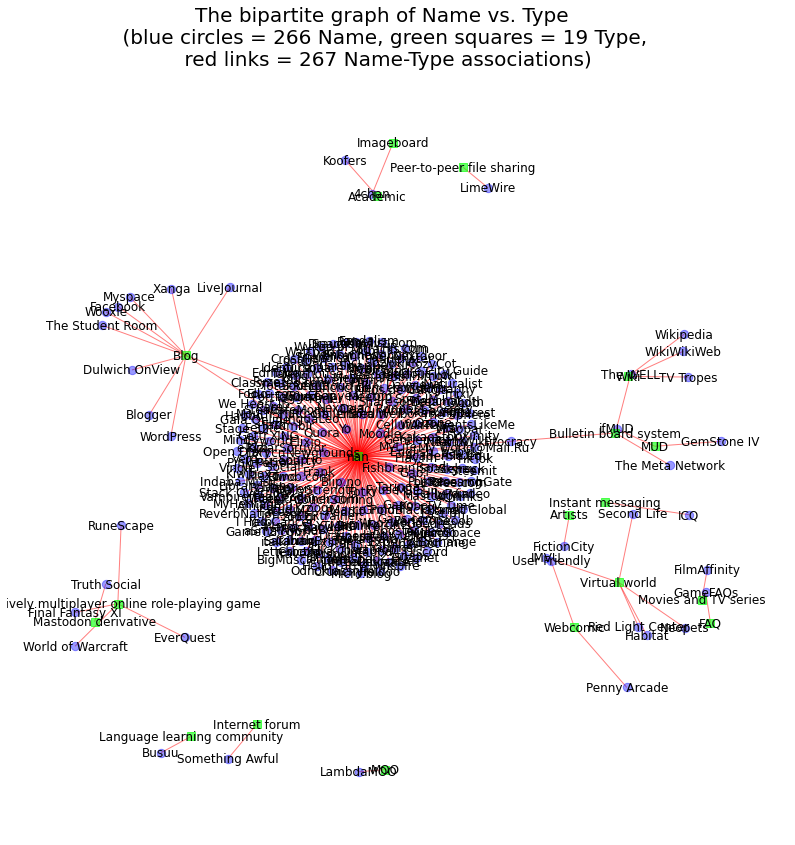

In [41]:
pos=nx.spring_layout(H,0.18)
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
# for i in H.nodes():
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,alpha=0.6);
nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');

In [42]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print(max(x.values()))
xx={i:j for i,j in list(x.items()) if j>1 and type(i)!=float}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice([y for y in list(x.items())])
n0

226


'Blog'

In [43]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in list(posa.items()): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in list(posaa.items()): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(list(posb.items())+list(posa.items())+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(list(posb.items())+list(posaa.items())+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

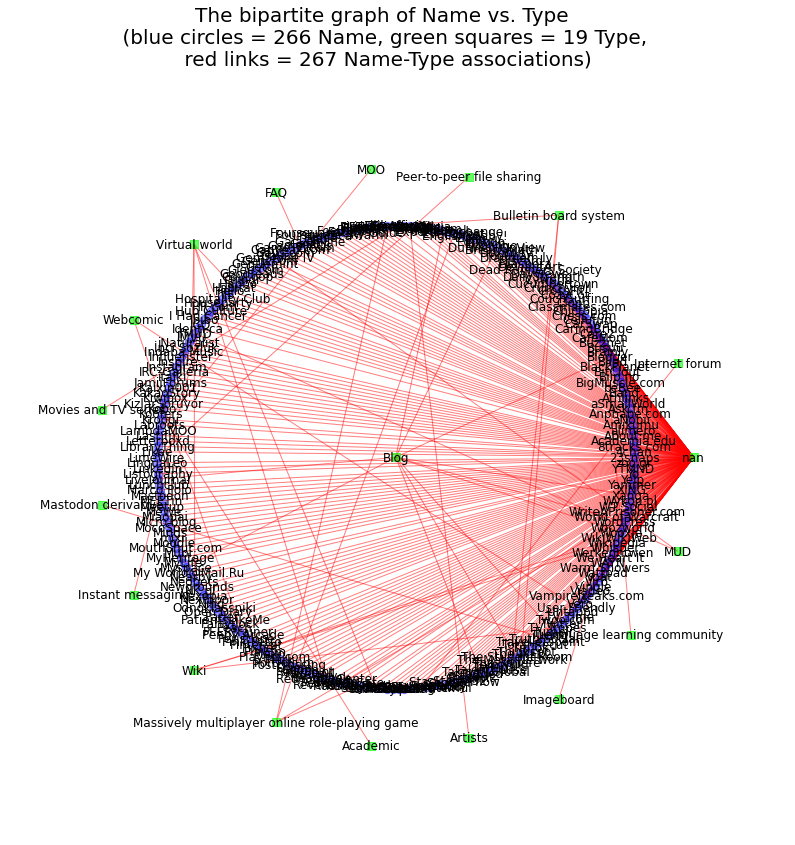

In [44]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=60,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
plt.margins(x=0.1, y=0.1) 

### Manual Change of the Second Column

In [45]:
# You may change manually the second column (the second mode of the bipartite graph).
# Below we get a random selection of this column:

Name=list(df.columns)
k=Name.index(nm)
if len(Name)>2:
    clm=random.choice([c for c in Name if c!=Name[0] and c!=Name[k]])
else:
    print("There is no other column. Consider rerunning the notebook until you get another column!")
print(clm)

# clm="Provider(s)"

k=Name.index(clm)
print(df.columns[0],len(df[df.columns[0]].unique()))
print(Name[k],cc[Name[k]])

Focus
Name 266
Focus 208


In [46]:
eds=[]
for i in range(len(df)):
    a=df.iloc[i][Name[0]] 
    b=df.iloc[i][Name[k]] 
    eds.append((a,b))
print(len(eds),len(set(eds)))

268 268


In [47]:
H=nx.Graph()
H.add_edges_from(eds)
rem=[n for n in H.nodes() if n=='']
H.remove_nodes_from(rem)
dc0=Name[0] #+"s"
dc1=Name[k] #+"es"
print("The graph of %s vs. %s has %i nodes and %i edges" %(dc0,dc1,len(H.nodes()),len(H.edges())))
ca=[n for n in H.nodes() if n in df[Name[0]].tolist()]
so=[n for n in H.nodes() if n not in df[Name[0]].tolist()]
nt=len(ca)
nh=len(so)
print("The %i nodes of this graph are:" %len(H.nodes()))
print("%i %s and %i %s" %(nt,dc0,nh,dc1))
if nx.is_bipartite(H)==True:
    print("This graph is bipartite")
else:
    print("This graph is not bipartite")
if nx.is_connected(H)==True:
    print("This graph is connected")
else:
    print("This graph is not connected and has", nx.number_connected_components(H), "connected components")
Hl = sorted(connected_component_subgraphs(H), key = len, reverse=True)
Hc=H.subgraph(Hl[0])
print('The largest connected component has:')
print("%i nodes and %i edges" %(len(Hc.nodes()), len(Hc.edges())))

The graph of Name vs. Focus has 474 nodes and 268 edges
The 474 nodes of this graph are:
266 Name and 208 Focus
This graph is bipartite
This graph is not connected and has 206 connected components
The largest connected component has:
47 nodes and 46 edges


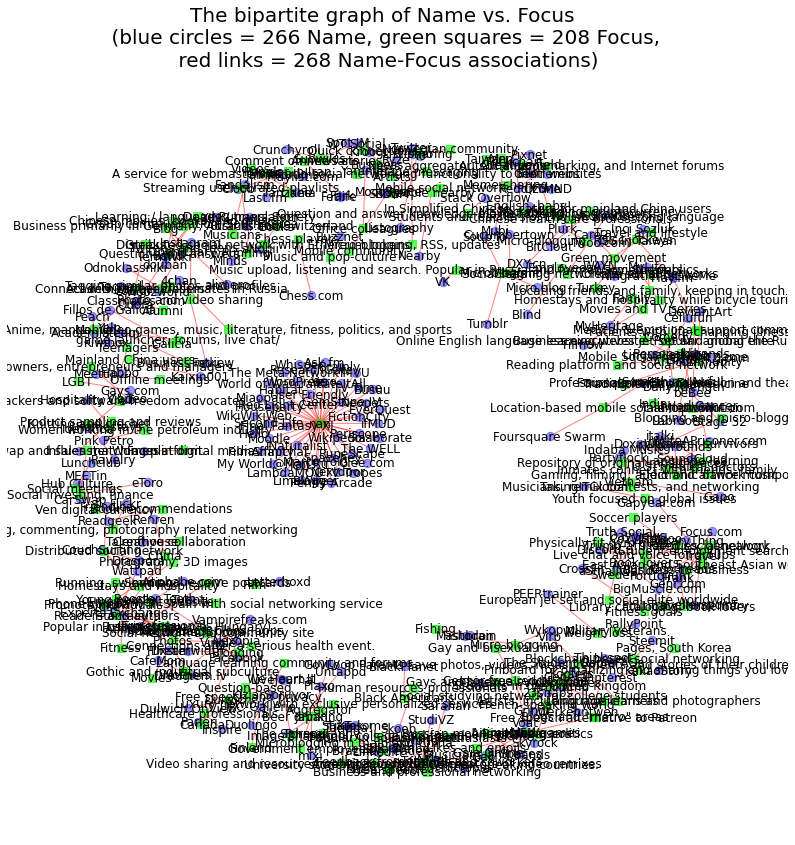

In [48]:
pos=nx.spring_layout(H,0.18)
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
# for i in H.nodes():
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
nx.draw_networkx_nodes(H,pos=pos,nodelist=ca,node_color='b',node_size=70,alpha=0.4);
nx.draw_networkx_nodes(H,pos=pos,nodelist=so,node_color='lime',node_shape="s",node_size=60,alpha=0.6);
nx.draw_networkx_edges(H,pos=pos,edge_color='r',alpha=0.5); #width=edgewidth,
nx.draw_networkx_labels(H,pos=pos,labels=labels,font_size=12);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');

In [49]:
# Degrees of Names > 1

x={}
for n in H.nodes():
    if n in so:
        x[n]=H.degree(n)
print(max(x.values()))
xx={i:j for i,j in list(x.items()) if j>1}
if len(xx)>0:
    sorted_xx = sorted(xx.items(), key=operator.itemgetter(1),reverse=True)
    n0=sorted_xx[0][0]
else:
    sorted_xx=xx
    n0=random.choice(list(x.items()))
n0

46


nan

In [50]:
Ha=H.subgraph(ca)
Hb=H.subgraph(so)
posb=nx.circular_layout(Hb)
posb[n0]=(0,0)
posaa=nx.circular_layout(Ha)
posa=nx.spring_layout(Ha,scale=1,k=4.7)
d=0.8 #1/0.7 #1.3 #1.3 #3
for k,v in list(posa.items()): 
    v[0] = v[0]*d
    v[1] = v[1]*d
for k,v in list(posaa.items()): 
    v[0] = v[0]*d
    v[1] = v[1]*d
posAll=dict(list(posb.items())+list(posa.items())+[(k,posb[k]+posa[k]) for k in set(posa)&set(posb)])
posAlla=dict(list(posb.items())+list(posaa.items())+[(k,posb[k]+posaa[k]) for k in set(posaa)&set(posb)])

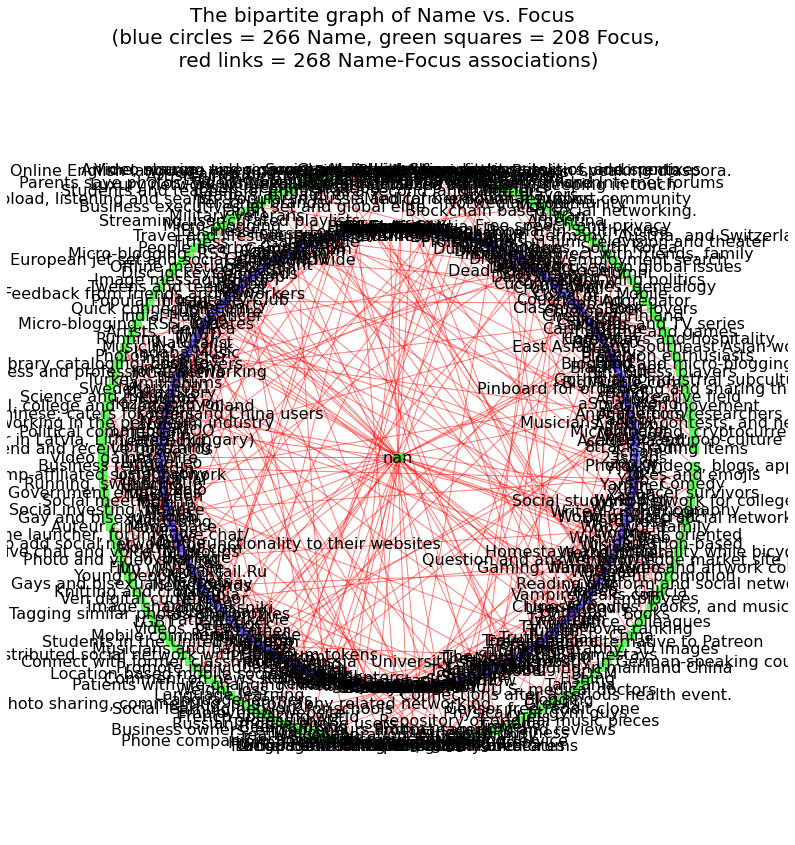

In [51]:
labels={}
for i in H.nodes():
    labels[i]=i
#     if i in ca:
#         labels[i]=i
#     else:
#         labels[i]=''
#     if H.degree(i)>1:
#         labels[i]=i
#     else:
#         labels[i]='' #i
fig = plt.figure(figsize=(14,14))
# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Ha,pos=posaa,nodelist=ca,node_color='b',node_size=70,alpha=0.4);
nx.draw_networkx_nodes(Hb,pos=posb,nodelist=so,node_color='lime',node_shape="s",node_size=60,alpha=0.6);
nx.draw_networkx_edges(H,pos=posAlla,edge_color='r',alpha=0.5);
# nx.draw_networkx_edges(H,pos=posAlla,edgelist=dict(Counter(mee)).keys(),alpha=0.6,edge_color='g',width=edgewidth);
nx.draw_networkx_labels(H,pos=posAlla,labels=labels,font_size=16);
sst="The bipartite graph of %s vs. %s \n (blue circles = %i %s, green squares = %i %s, \n red links = %i %s-%s associations)" %(dc0,dc1,nt,dc0,nh,dc1,len(H.edges()),dc0,dc1)
fig.suptitle(sst,x=0.5, y=.95, fontsize=20);
plt.axis('off');
plt.margins(x=0.1, y=0.1) 

###Stretch Assignment (Extra Credit)

Extract data from another web source and construct a bipartite graph. In your assignment write up discuss understanding you can gain from the bipartite graph and the relationships.